Top 10 Building Violations:
description
Improper storage trash: res       408091
Overfilling of barrel/dumpster     74365
Overgrown Weeds On Property        60246
Failure clear sidewalk - snow      39090
Improper storage trash: com        34143
Illegal dumping < 1 cubic yd       19612
Occupying City prop wo permit       8809
illegal parking prop owner 1        6363
illegal parking prop owner 2        6359
Unregistered motor vehicles- 2      4816
Name: count, dtype: int64

Top 10 Public Works Violations:
description
Failure to Obtain Permit          3743
Unsafe and Dangerous              3606
Maintenance                       1313
Testing & Certification            790
Right of Entry                     657
Unsafe Structures                  557
Inspections                        513
Failed to comply w permit term     409
Certificate of Occupancy           286
Building or Use of Premise req     280
Name: count, dtype: int64


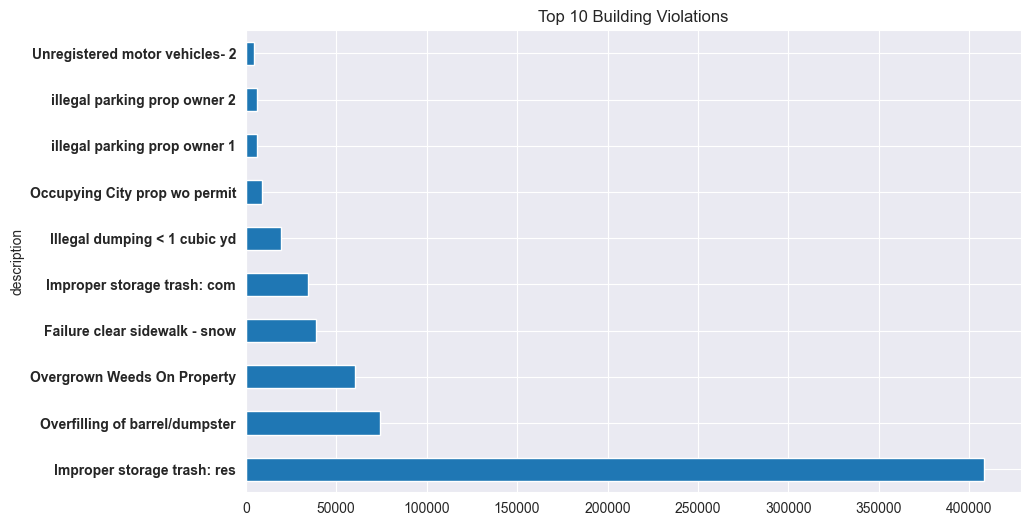

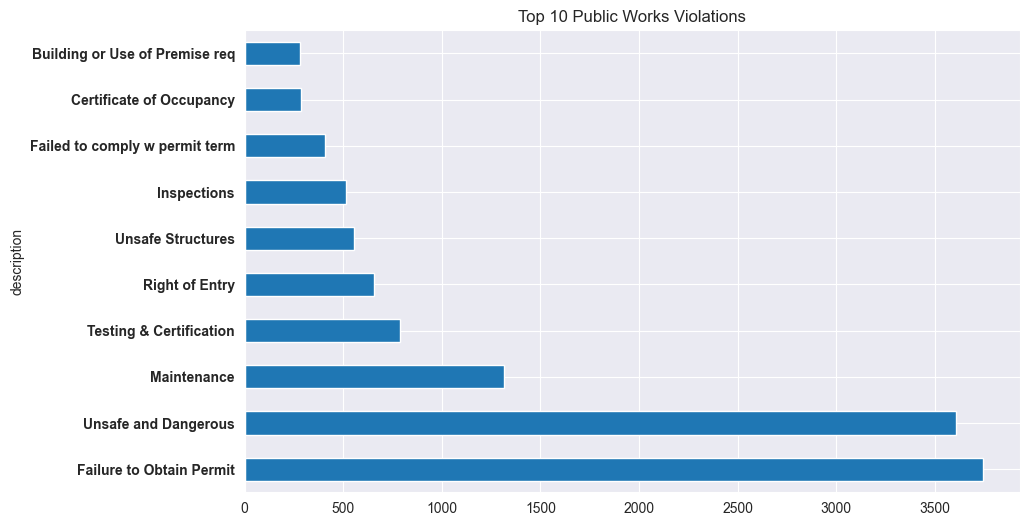

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

building_violations_path = 'updated_BUILDING_AND_PROPERTY_VIOLATIONS.csv'
public_works_violations_path = 'updated_PUBLIC_WORKS_VIOLATIONS.csv'

building_violations = pd.read_csv(building_violations_path)
public_works_violations = pd.read_csv(public_works_violations_path)

building_violations = building_violations.dropna(subset=['description'])
public_works_violations = public_works_violations.dropna(subset=['description'])

building_counts = building_violations['description'].value_counts().head(10)
public_works_counts = public_works_violations['description'].value_counts().head(10)

print("Top 10 Building Violations:")
print(building_counts)
print("\nTop 10 Public Works Violations:")
print(public_works_counts)

# Plot for Building Violations
plt.figure(figsize=(10, 6))
building_counts.plot(kind='barh', title='Top 10 Building Violations')
plt.yticks(fontweight='bold')
plt.show()

# Plot for Public Works Violations
plt.figure(figsize=(10, 6))
public_works_counts.plot(kind='barh', title='Top 10 Public Works Violations')
plt.yticks(fontweight='bold')
plt.show()


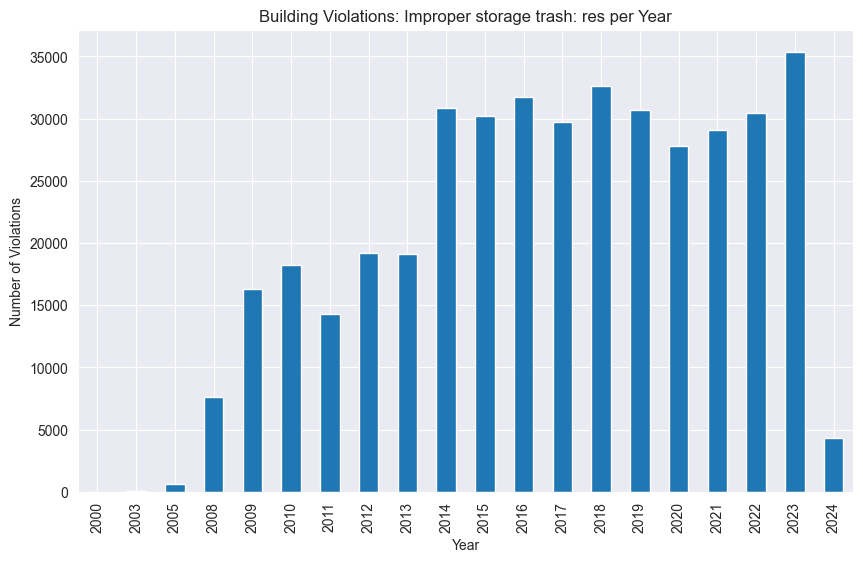

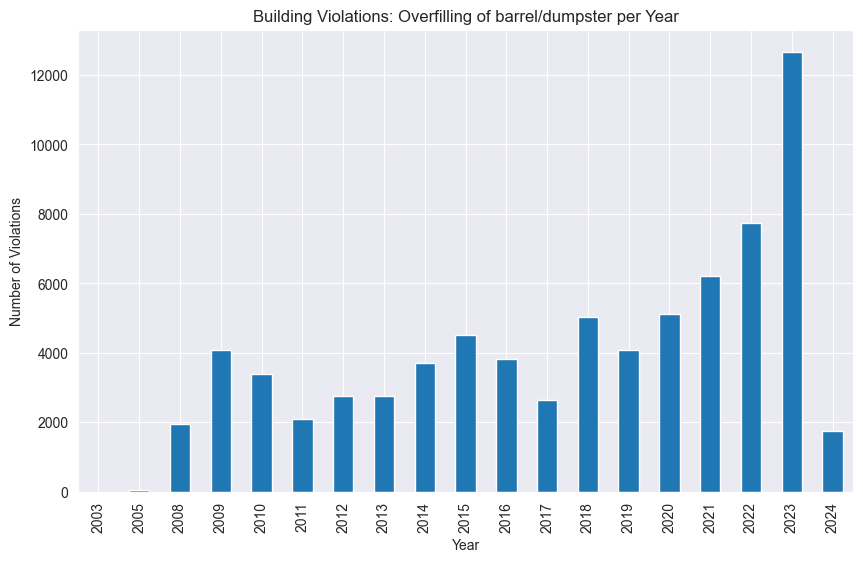

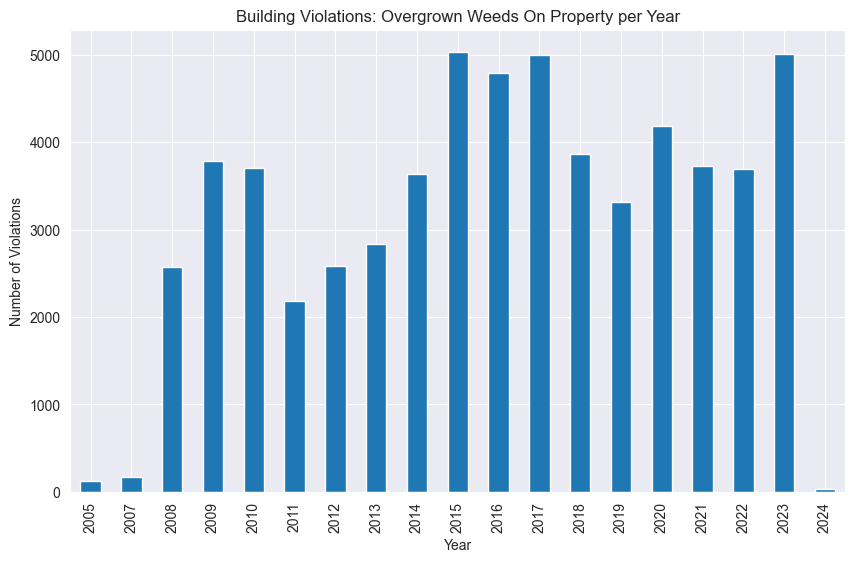

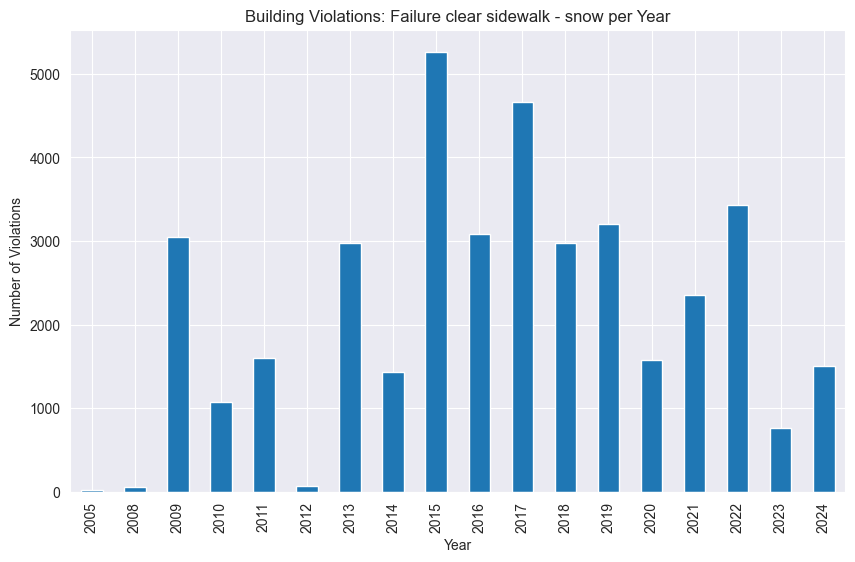

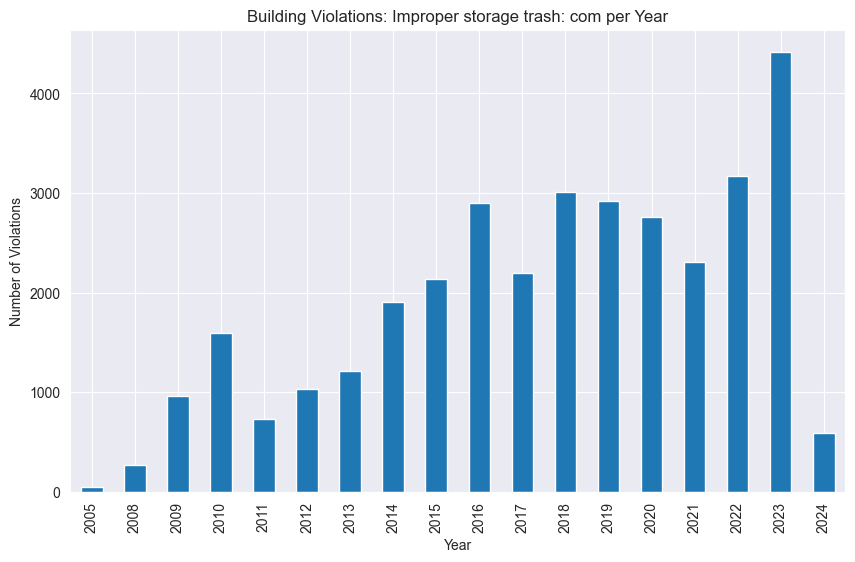

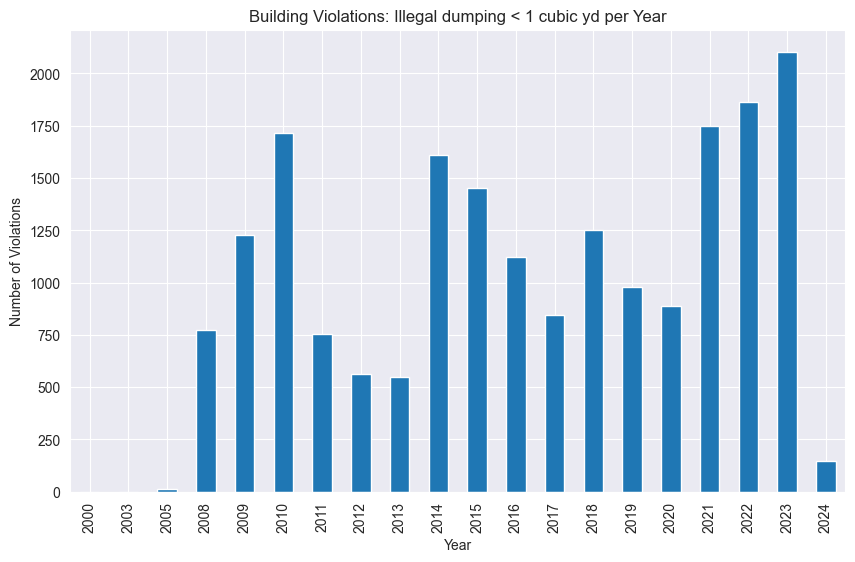

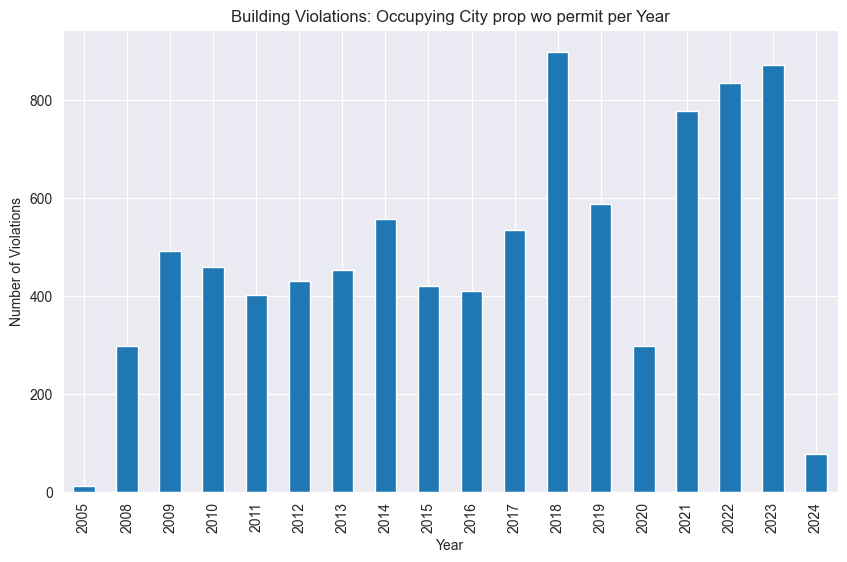

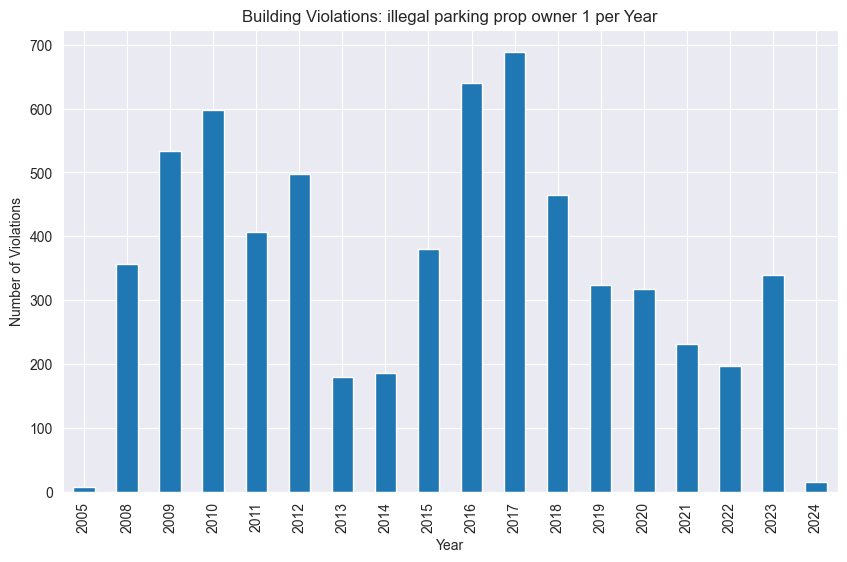

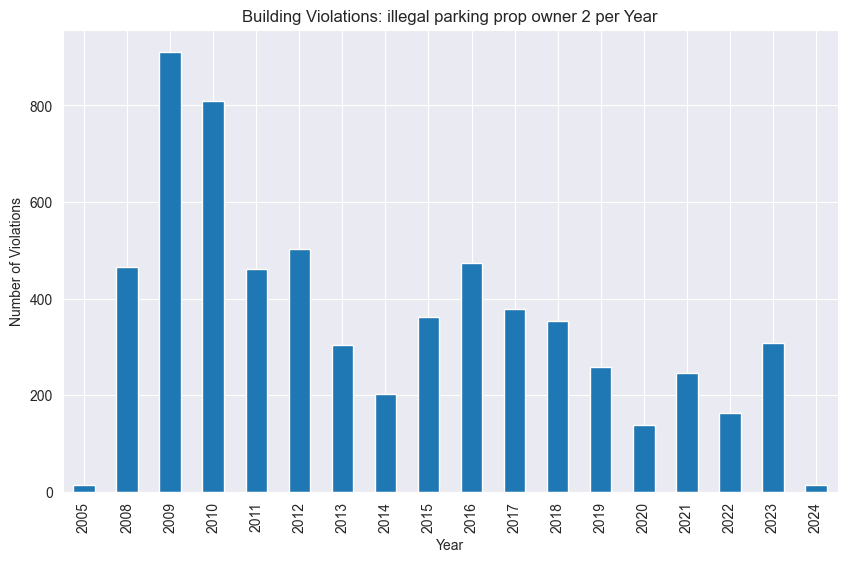

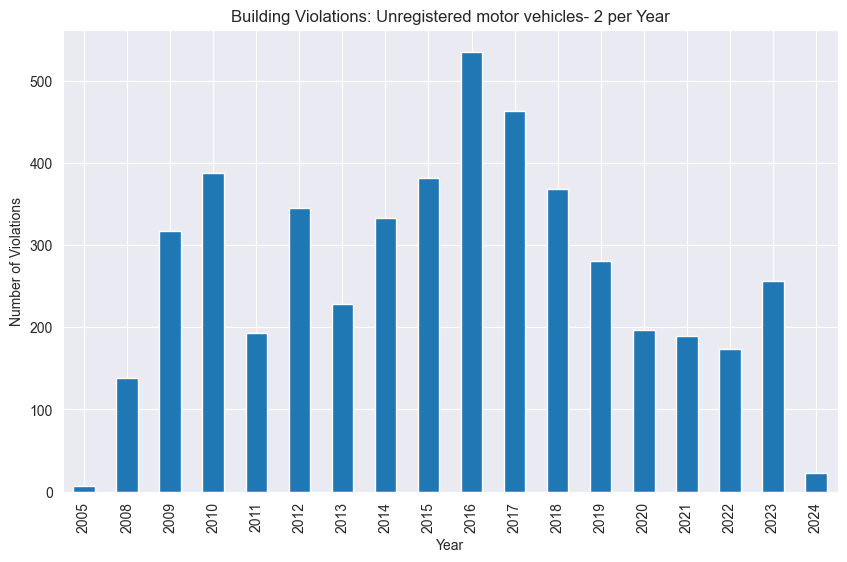

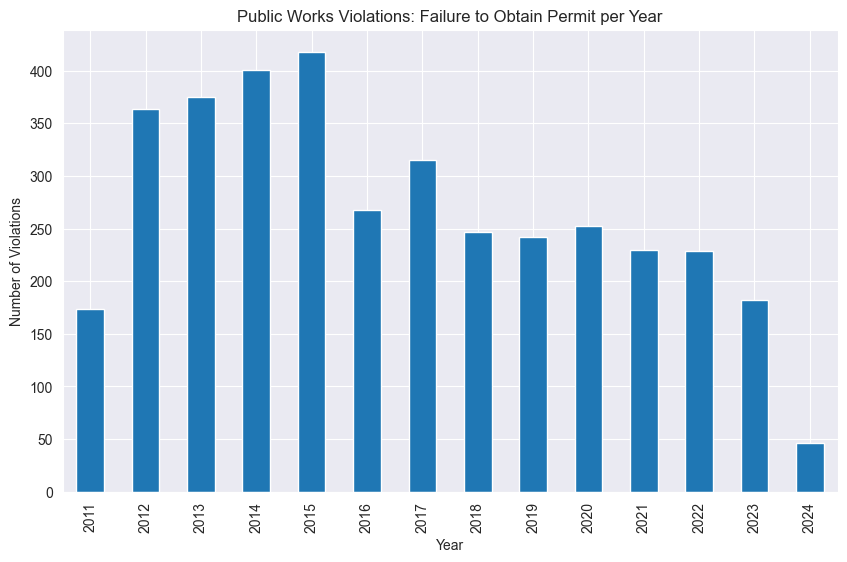

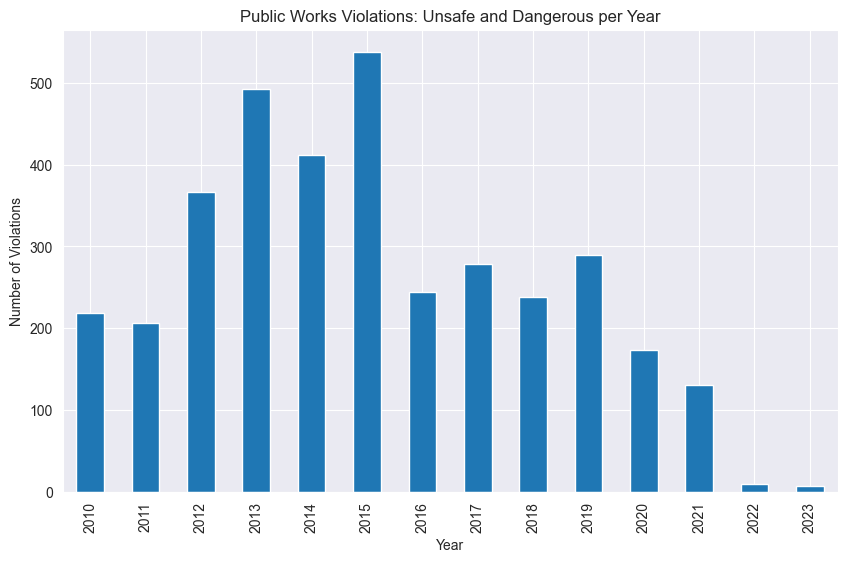

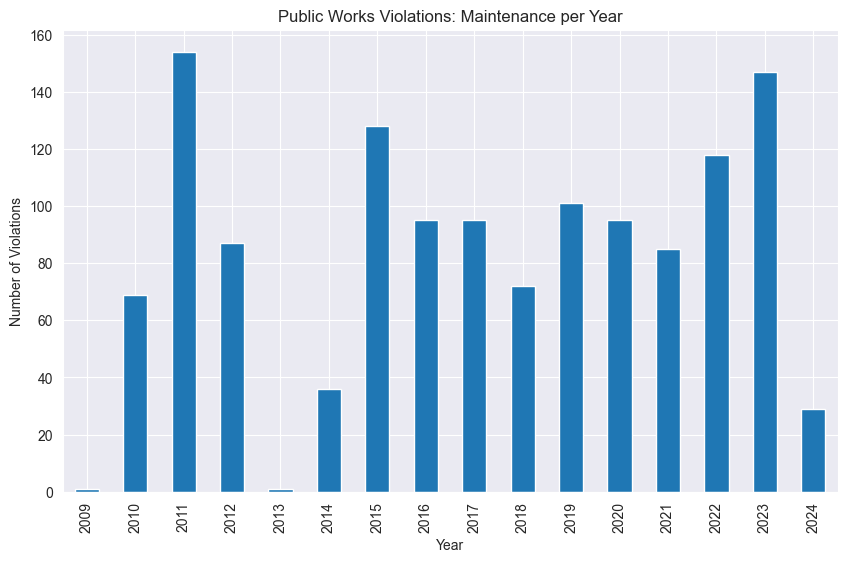

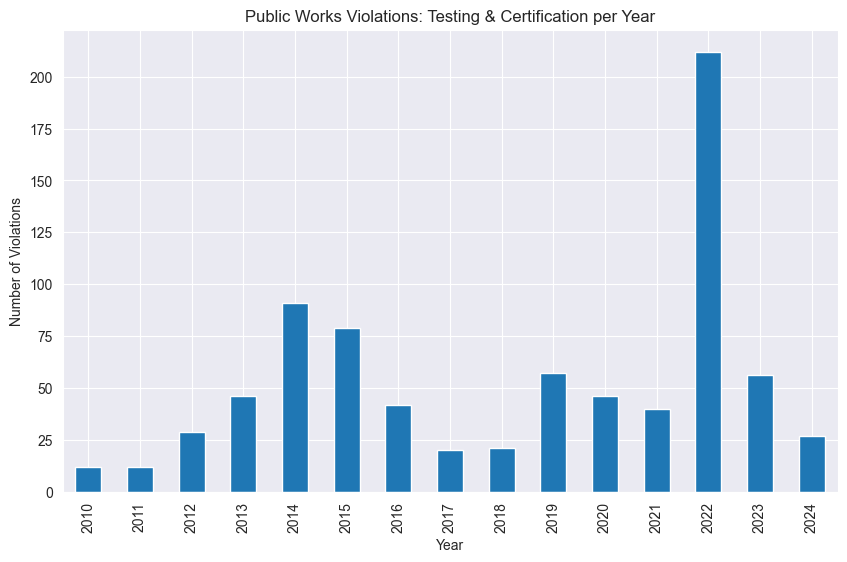

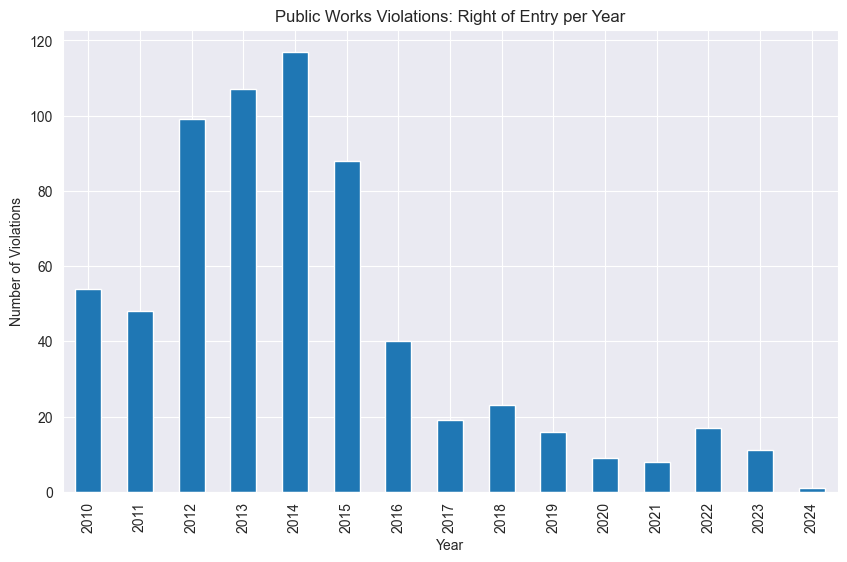

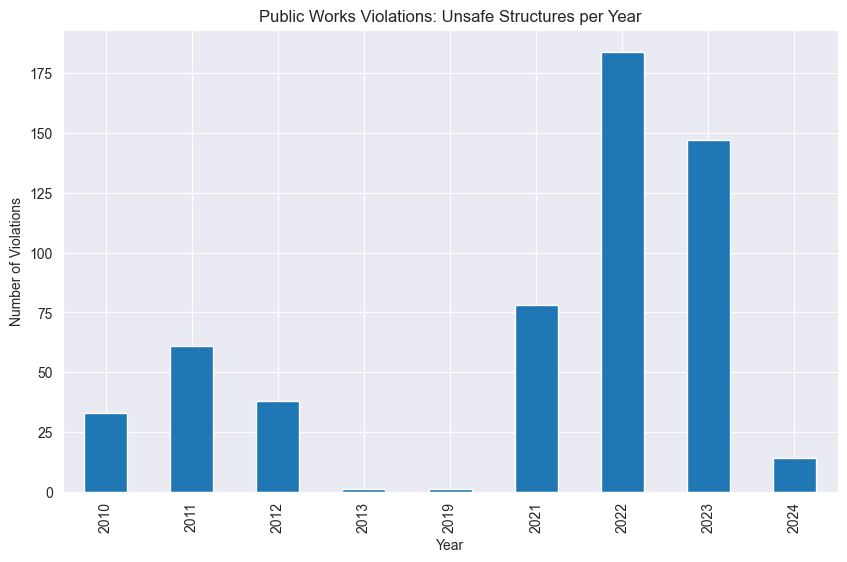

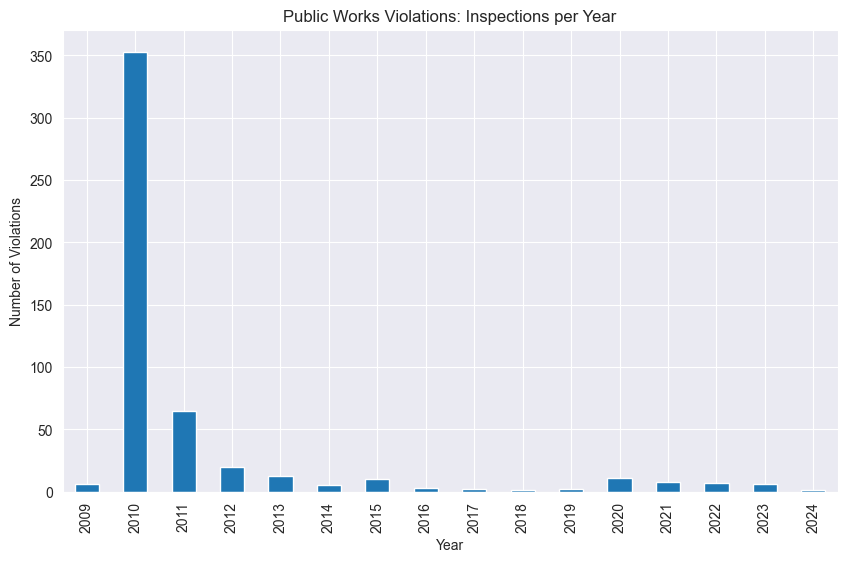

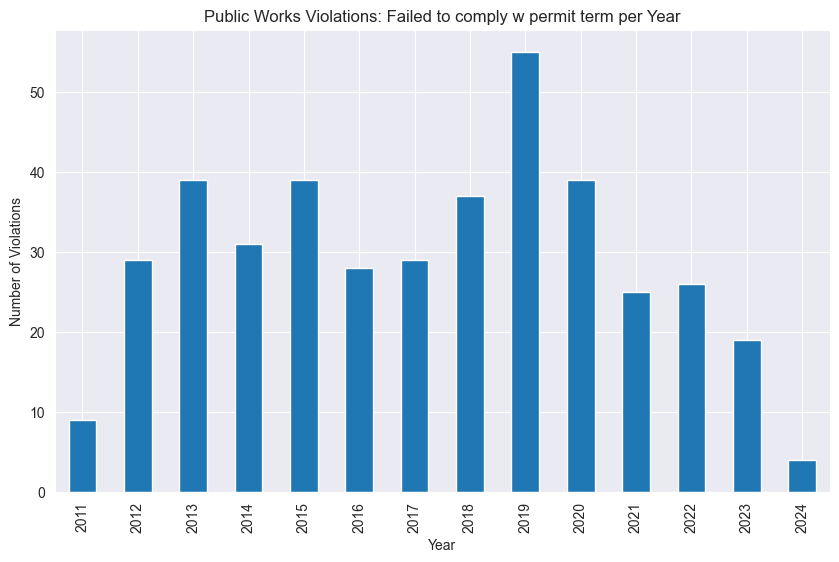

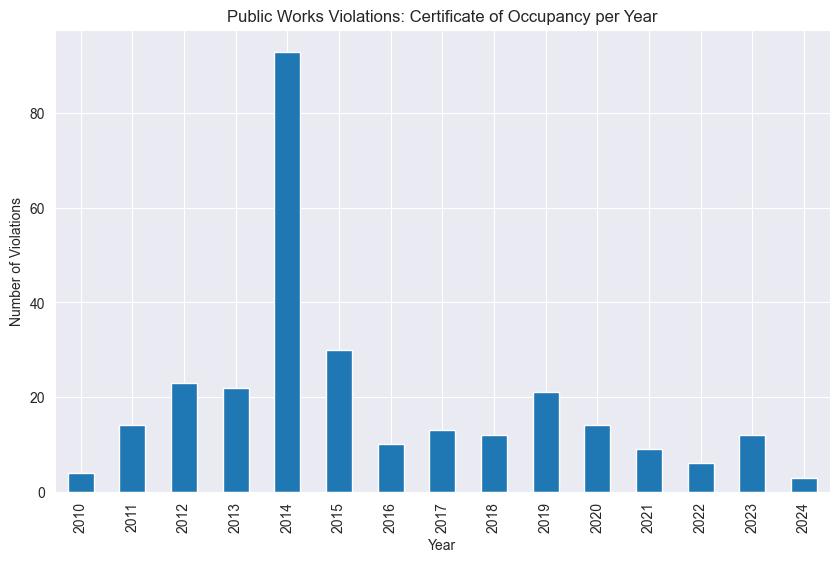

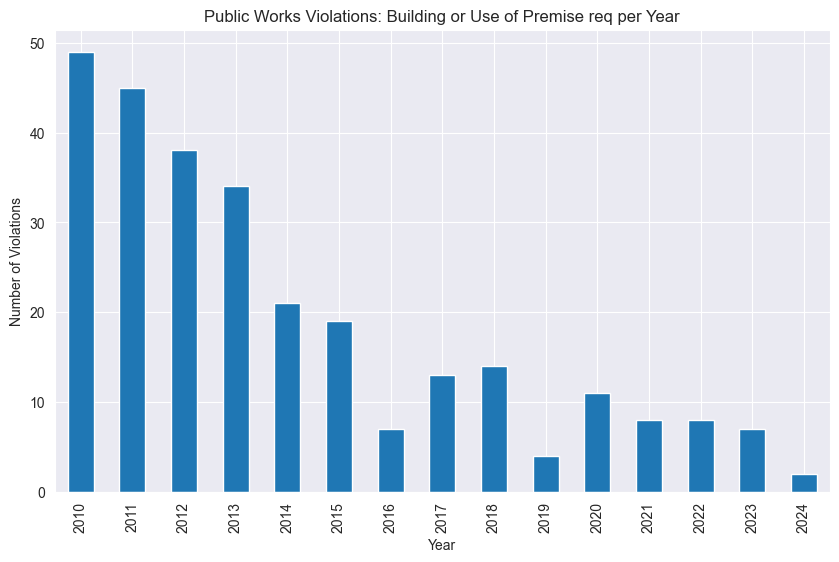

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def read_data(path, date_col):
    data = pd.read_csv(path)
    data[date_col] = pd.to_datetime(data[date_col], errors='coerce')
    data = data.dropna(subset=[date_col])
    data['Year'] = data[date_col].dt.year
    return data

def plot_violations(data, top_violations, title):
    for violation in top_violations:
        yearly_data = data[data['description'] == violation].groupby('Year').size()
        plt.figure(figsize=(10, 6))
        yearly_data.plot(kind='bar')
        plt.title(f'{title}: {violation} per Year')
        plt.xlabel('Year')
        plt.ylabel('Number of Violations')
        plt.show()

building_path = 'updated_BUILDING_AND_PROPERTY_VIOLATIONS.csv'
public_works_path = 'updated_PUBLIC_WORKS_VIOLATIONS.csv'

building_data = read_data(building_path, 'status_dttm')
public_works_data = read_data(public_works_path, 'status_dttm')

top10_building = building_data['description'].value_counts().head(10).index
top10_public_works = public_works_data['description'].value_counts().head(10).index

plot_violations(building_data, top10_building, 'Building Violations')
plot_violations(public_works_data, top10_public_works, 'Public Works Violations')
